In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold

In [ ]:
data=pd.read_csv(r'C:\Users\KIIT\Downloads\1805384.csv')

In [ ]:
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corporation,2019-08-16 00:00:00,2019.0,1.929705e+09,2019-08-06,20190805,20190806,20190821.0,USD,RV,1.0,NaN,59047.12,20190806.0,NAH4,1.929705e+09,0
1,U001,0200780383,MEIJ corp,2019-11-25 00:00:00,2019.0,1.930125e+09,2019-11-07,20191108,20191107,20191122.0,USD,RV,1.0,NaN,20521.20,20191107.0,NAA8,1.930125e+09,0
2,U001,0200726979,BJ'S corp,2019-10-15 00:00:00,2019.0,1.929939e+09,2019-09-28,20190928,20190928,20191013.0,USD,RV,1.0,NaN,284.89,20190928.0,NAA8,1.929939e+09,0
3,U001,0200789077,US,2019-01-18 00:00:00,2019.0,1.928555e+09,2019-01-02,20190103,20190102,20190117.0,USD,RV,1.0,NaN,71429.91,20190102.0,NAA8,1.928555e+09,0
4,U001,0200769623,WAL-MAR,2019-06-03 00:00:00,2019.0,1.929360e+09,2019-05-22,20190522,20190522,20190606.0,USD,RV,1.0,NaN,41314.13,20190522.0,NAH4,1.929360e+09,0


In [ ]:
data.shape

(50000, 19)

Converting all dates to date time format

In [ ]:
data['document_create_date'].dtype
data['document_create_date']=data['document_create_date'].astype('str')
data['document_create_date']=pd.to_datetime(data['document_create_date'])
data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corporation,2019-08-16 00:00:00,2019.0,1.929705e+09,2019-08-06,2019-08-05,20190806,20190821.0,USD,RV,1.0,NaN,59047.12,20190806.0,NAH4,1.929705e+09,0
1,U001,0200780383,MEIJ corp,2019-11-25 00:00:00,2019.0,1.930125e+09,2019-11-07,2019-11-08,20191107,20191122.0,USD,RV,1.0,NaN,20521.20,20191107.0,NAA8,1.930125e+09,0
2,U001,0200726979,BJ'S corp,2019-10-15 00:00:00,2019.0,1.929939e+09,2019-09-28,2019-09-28,20190928,20191013.0,USD,RV,1.0,NaN,284.89,20190928.0,NAA8,1.929939e+09,0
3,U001,0200789077,US,2019-01-18 00:00:00,2019.0,1.928555e+09,2019-01-02,2019-01-03,20190102,20190117.0,USD,RV,1.0,NaN,71429.91,20190102.0,NAA8,1.928555e+09,0
4,U001,0200769623,WAL-MAR,2019-06-03 00:00:00,2019.0,1.929360e+09,2019-05-22,2019-05-22,20190522,20190606.0,USD,RV,1.0,NaN,41314.13,20190522.0,NAH4,1.929360e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200769623,WAL-MAR,NaN,2020.0,1.930798e+09,2020-04-17,2020-04-17,20200417,20200502.0,USD,RV,1.0,NaN,34892.66,20200417.0,NAH4,1.930798e+09,1
49996,U001,0200729290,KROGER trust,NaN,2020.0,1.930624e+09,2020-03-09,2020-03-08,20200309,20200324.0,USD,RV,1.0,NaN,76291.15,20200309.0,NAA8,1.930624e+09,1
49997,U001,0200707822,PUBLI corporation,NaN,2020.0,1.930693e+09,2020-03-26,2020-03-24,20200326,20200410.0,USD,RV,1.0,NaN,177940.22,20200326.0,NAA8,1.930693e+09,1
49998,U001,0200761734,H E BUT corp,NaN,2020.0,1.930642e+09,2020-03-13,2020-03-12,20200313,20200328.0,USD,RV,1.0,NaN,24646.09,20200313.0,NAA8,1.930642e+09,1


In [ ]:
data['document_create_date.1'].dtype
data['document_create_date.1']=data['document_create_date.1'].astype('str')
data['document_create_date.1']=pd.to_datetime(data['document_create_date.1'])
data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corporation,2019-08-16 00:00:00,2019.0,1.929705e+09,2019-08-06,2019-08-05,2019-08-06,20190821.0,USD,RV,1.0,NaN,59047.12,20190806.0,NAH4,1.929705e+09,0
1,U001,0200780383,MEIJ corp,2019-11-25 00:00:00,2019.0,1.930125e+09,2019-11-07,2019-11-08,2019-11-07,20191122.0,USD,RV,1.0,NaN,20521.20,20191107.0,NAA8,1.930125e+09,0
2,U001,0200726979,BJ'S corp,2019-10-15 00:00:00,2019.0,1.929939e+09,2019-09-28,2019-09-28,2019-09-28,20191013.0,USD,RV,1.0,NaN,284.89,20190928.0,NAA8,1.929939e+09,0
3,U001,0200789077,US,2019-01-18 00:00:00,2019.0,1.928555e+09,2019-01-02,2019-01-03,2019-01-02,20190117.0,USD,RV,1.0,NaN,71429.91,20190102.0,NAA8,1.928555e+09,0
4,U001,0200769623,WAL-MAR,2019-06-03 00:00:00,2019.0,1.929360e+09,2019-05-22,2019-05-22,2019-05-22,20190606.0,USD,RV,1.0,NaN,41314.13,20190522.0,NAH4,1.929360e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200769623,WAL-MAR,NaN,2020.0,1.930798e+09,2020-04-17,2020-04-17,2020-04-17,20200502.0,USD,RV,1.0,NaN,34892.66,20200417.0,NAH4,1.930798e+09,1
49996,U001,0200729290,KROGER trust,NaN,2020.0,1.930624e+09,2020-03-09,2020-03-08,2020-03-09,20200324.0,USD,RV,1.0,NaN,76291.15,20200309.0,NAA8,1.930624e+09,1
49997,U001,0200707822,PUBLI corporation,NaN,2020.0,1.930693e+09,2020-03-26,2020-03-24,2020-03-26,20200410.0,USD,RV,1.0,NaN,177940.22,20200326.0,NAA8,1.930693e+09,1
49998,U001,0200761734,H E BUT corp,NaN,2020.0,1.930642e+09,2020-03-13,2020-03-12,2020-03-13,20200328.0,USD,RV,1.0,NaN,24646.09,20200313.0,NAA8,1.930642e+09,1


In [ ]:
data['due_in_date']=data['due_in_date'].astype('str')
data['due_in_date']=pd.to_datetime(data['due_in_date'],format='%Y%m%d',errors='ignore')
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corporation,2019-08-16 00:00:00,2019.0,1.929705e+09,2019-08-06,2019-08-05,2019-08-06,2019-08-21,USD,RV,1.0,NaN,59047.12,20190806.0,NAH4,1.929705e+09,0
1,U001,0200780383,MEIJ corp,2019-11-25 00:00:00,2019.0,1.930125e+09,2019-11-07,2019-11-08,2019-11-07,2019-11-22,USD,RV,1.0,NaN,20521.20,20191107.0,NAA8,1.930125e+09,0
2,U001,0200726979,BJ'S corp,2019-10-15 00:00:00,2019.0,1.929939e+09,2019-09-28,2019-09-28,2019-09-28,2019-10-13,USD,RV,1.0,NaN,284.89,20190928.0,NAA8,1.929939e+09,0
3,U001,0200789077,US,2019-01-18 00:00:00,2019.0,1.928555e+09,2019-01-02,2019-01-03,2019-01-02,2019-01-17,USD,RV,1.0,NaN,71429.91,20190102.0,NAA8,1.928555e+09,0
4,U001,0200769623,WAL-MAR,2019-06-03 00:00:00,2019.0,1.929360e+09,2019-05-22,2019-05-22,2019-05-22,2019-06-06,USD,RV,1.0,NaN,41314.13,20190522.0,NAH4,1.929360e+09,0


In [ ]:
data['baseline_create_date']=pd.to_datetime(data['baseline_create_date'],format='%Y%m%d',errors='ignore')
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corporation,2019-08-16 00:00:00,2019.0,1.929705e+09,2019-08-06,2019-08-05,2019-08-06,2019-08-21,USD,RV,1.0,NaN,59047.12,2019-08-06,NAH4,1.929705e+09,0
1,U001,0200780383,MEIJ corp,2019-11-25 00:00:00,2019.0,1.930125e+09,2019-11-07,2019-11-08,2019-11-07,2019-11-22,USD,RV,1.0,NaN,20521.20,2019-11-07,NAA8,1.930125e+09,0
2,U001,0200726979,BJ'S corp,2019-10-15 00:00:00,2019.0,1.929939e+09,2019-09-28,2019-09-28,2019-09-28,2019-10-13,USD,RV,1.0,NaN,284.89,2019-09-28,NAA8,1.929939e+09,0
3,U001,0200789077,US,2019-01-18 00:00:00,2019.0,1.928555e+09,2019-01-02,2019-01-03,2019-01-02,2019-01-17,USD,RV,1.0,NaN,71429.91,2019-01-02,NAA8,1.928555e+09,0
4,U001,0200769623,WAL-MAR,2019-06-03 00:00:00,2019.0,1.929360e+09,2019-05-22,2019-05-22,2019-05-22,2019-06-06,USD,RV,1.0,NaN,41314.13,2019-05-22,NAH4,1.929360e+09,0


In [ ]:
data['buisness_year']=pd.to_datetime(data['buisness_year'],format='%Y%m%d',errors='ignore')
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corporation,2019-08-16 00:00:00,2019,1.929705e+09,2019-08-06,2019-08-05,2019-08-06,2019-08-21,USD,RV,1.0,NaN,59047.12,2019-08-06,NAH4,1.929705e+09,0
1,U001,0200780383,MEIJ corp,2019-11-25 00:00:00,2019,1.930125e+09,2019-11-07,2019-11-08,2019-11-07,2019-11-22,USD,RV,1.0,NaN,20521.20,2019-11-07,NAA8,1.930125e+09,0
2,U001,0200726979,BJ'S corp,2019-10-15 00:00:00,2019,1.929939e+09,2019-09-28,2019-09-28,2019-09-28,2019-10-13,USD,RV,1.0,NaN,284.89,2019-09-28,NAA8,1.929939e+09,0
3,U001,0200789077,US,2019-01-18 00:00:00,2019,1.928555e+09,2019-01-02,2019-01-03,2019-01-02,2019-01-17,USD,RV,1.0,NaN,71429.91,2019-01-02,NAA8,1.928555e+09,0
4,U001,0200769623,WAL-MAR,2019-06-03 00:00:00,2019,1.929360e+09,2019-05-22,2019-05-22,2019-05-22,2019-06-06,USD,RV,1.0,NaN,41314.13,2019-05-22,NAH4,1.929360e+09,0


In [ ]:
data['clear_date'].dtype
data['clear_date']=data['clear_date'].astype('str')
data['clear_date']=pd.to_datetime(data['clear_date'])
data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corporation,2019-08-16,2019,1.929705e+09,2019-08-06,2019-08-05,2019-08-06,2019-08-21,USD,RV,1.0,NaN,59047.12,2019-08-06,NAH4,1.929705e+09,0
1,U001,0200780383,MEIJ corp,2019-11-25,2019,1.930125e+09,2019-11-07,2019-11-08,2019-11-07,2019-11-22,USD,RV,1.0,NaN,20521.20,2019-11-07,NAA8,1.930125e+09,0
2,U001,0200726979,BJ'S corp,2019-10-15,2019,1.929939e+09,2019-09-28,2019-09-28,2019-09-28,2019-10-13,USD,RV,1.0,NaN,284.89,2019-09-28,NAA8,1.929939e+09,0
3,U001,0200789077,US,2019-01-18,2019,1.928555e+09,2019-01-02,2019-01-03,2019-01-02,2019-01-17,USD,RV,1.0,NaN,71429.91,2019-01-02,NAA8,1.928555e+09,0
4,U001,0200769623,WAL-MAR,2019-06-03,2019,1.929360e+09,2019-05-22,2019-05-22,2019-05-22,2019-06-06,USD,RV,1.0,NaN,41314.13,2019-05-22,NAH4,1.929360e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200769623,WAL-MAR,NaT,2020,1.930798e+09,2020-04-17,2020-04-17,2020-04-17,2020-05-02,USD,RV,1.0,NaN,34892.66,2020-04-17,NAH4,1.930798e+09,1
49996,U001,0200729290,KROGER trust,NaT,2020,1.930624e+09,2020-03-09,2020-03-08,2020-03-09,2020-03-24,USD,RV,1.0,NaN,76291.15,2020-03-09,NAA8,1.930624e+09,1
49997,U001,0200707822,PUBLI corporation,NaT,2020,1.930693e+09,2020-03-26,2020-03-24,2020-03-26,2020-04-10,USD,RV,1.0,NaN,177940.22,2020-03-26,NAA8,1.930693e+09,1
49998,U001,0200761734,H E BUT corp,NaT,2020,1.930642e+09,2020-03-13,2020-03-12,2020-03-13,2020-03-28,USD,RV,1.0,NaN,24646.09,2020-03-13,NAA8,1.930642e+09,1


Extracting the null values from clear_date and storing it in a dataframe

In [ ]:
d=data.loc[data.clear_date.isnull()]
d


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
45882,U001,0100012482,UNI trust,NaT,2020,1.930838e+09,2020-05-01,2020-04-29,2020-05-01,2020-05-16,USD,RV,1.0,NaN,9819.09,2020-05-01,NAA8,1.930838e+09,1
45883,U001,200744019,TARG foundation,NaT,2020,1.930883e+09,2020-05-09,2020-05-09,2020-05-09,2020-05-24,USD,RV,1.0,NaN,9248.53,2020-05-09,NAA8,1.930883e+09,1
45884,U001,0200759878,SA systems,NaT,2020,1.930764e+09,2020-04-08,2020-04-08,2020-04-08,2020-04-23,USD,RV,1.0,NaN,28665.51,2020-04-08,NAH4,1.930764e+09,1
45885,U001,0200726979,BJ'S corporation,NaT,2020,1.930778e+09,2020-04-11,2020-04-11,2020-04-11,2020-04-26,USD,RV,1.0,NaN,745.33,2020-04-11,NAA8,1.930778e+09,1
45886,U001,0200776463,KROGE systems,NaT,2020,1.930790e+09,2020-04-15,2020-04-16,2020-04-15,2020-04-30,USD,RV,1.0,NaN,35048.91,2020-04-15,NAA8,1.930790e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200769623,WAL-MAR,NaT,2020,1.930798e+09,2020-04-17,2020-04-17,2020-04-17,2020-05-02,USD,RV,1.0,NaN,34892.66,2020-04-17,NAH4,1.930798e+09,1
49996,U001,0200729290,KROGER trust,NaT,2020,1.930624e+09,2020-03-09,2020-03-08,2020-03-09,2020-03-24,USD,RV,1.0,NaN,76291.15,2020-03-09,NAA8,1.930624e+09,1
49997,U001,0200707822,PUBLI corporation,NaT,2020,1.930693e+09,2020-03-26,2020-03-24,2020-03-26,2020-04-10,USD,RV,1.0,NaN,177940.22,2020-03-26,NAA8,1.930693e+09,1
49998,U001,0200761734,H E BUT corp,NaT,2020,1.930642e+09,2020-03-13,2020-03-12,2020-03-13,2020-03-28,USD,RV,1.0,NaN,24646.09,2020-03-13,NAA8,1.930642e+09,1


In [ ]:
#Dropping it from the original data
data.drop(data[data.clear_date.isnull()].index,inplace=True)
data


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corporation,2019-08-16,2019,1.929705e+09,2019-08-06,2019-08-05,2019-08-06,2019-08-21,USD,RV,1.0,NaN,59047.12,2019-08-06,NAH4,1.929705e+09,0
1,U001,0200780383,MEIJ corp,2019-11-25,2019,1.930125e+09,2019-11-07,2019-11-08,2019-11-07,2019-11-22,USD,RV,1.0,NaN,20521.20,2019-11-07,NAA8,1.930125e+09,0
2,U001,0200726979,BJ'S corp,2019-10-15,2019,1.929939e+09,2019-09-28,2019-09-28,2019-09-28,2019-10-13,USD,RV,1.0,NaN,284.89,2019-09-28,NAA8,1.929939e+09,0
3,U001,0200789077,US,2019-01-18,2019,1.928555e+09,2019-01-02,2019-01-03,2019-01-02,2019-01-17,USD,RV,1.0,NaN,71429.91,2019-01-02,NAA8,1.928555e+09,0
4,U001,0200769623,WAL-MAR,2019-06-03,2019,1.929360e+09,2019-05-22,2019-05-22,2019-05-22,2019-06-06,USD,RV,1.0,NaN,41314.13,2019-05-22,NAH4,1.929360e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45877,U001,0200759878,SA,2020-02-07,2020,1.930425e+09,2020-01-21,2020-01-22,2020-01-21,2020-02-05,USD,RV,1.0,NaN,45152.63,2020-01-21,NAH4,1.930425e+09,0
45878,U001,0200722444,PERFOR llc,2019-08-07,2019,1.929657e+09,2019-07-27,2019-07-24,2019-07-27,2019-08-11,USD,RV,1.0,NaN,2806.38,2019-07-27,NAA8,1.929657e+09,0
45879,CA02,0140104429,COSTCO corp,2020-02-12,2020,2.960610e+09,2020-01-27,2020-01-27,2020-01-27,2020-02-07,CAD,RV,1.0,NaN,1466.17,2020-01-28,CA10,2.960610e+09,0
45880,U001,0200762301,C&S WH systems,2019-10-01,2019,1.929876e+09,2019-09-16,2019-09-15,2019-09-16,2019-10-01,USD,RV,1.0,NaN,113144.08,2019-09-16,NAC6,1.929876e+09,0


In [ ]:
d

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
45882,U001,0100012482,UNI trust,NaT,2020,1.930838e+09,2020-05-01,2020-04-29,2020-05-01,2020-05-16,USD,RV,1.0,NaN,9819.09,2020-05-01,NAA8,1.930838e+09,1
45883,U001,200744019,TARG foundation,NaT,2020,1.930883e+09,2020-05-09,2020-05-09,2020-05-09,2020-05-24,USD,RV,1.0,NaN,9248.53,2020-05-09,NAA8,1.930883e+09,1
45884,U001,0200759878,SA systems,NaT,2020,1.930764e+09,2020-04-08,2020-04-08,2020-04-08,2020-04-23,USD,RV,1.0,NaN,28665.51,2020-04-08,NAH4,1.930764e+09,1
45885,U001,0200726979,BJ'S corporation,NaT,2020,1.930778e+09,2020-04-11,2020-04-11,2020-04-11,2020-04-26,USD,RV,1.0,NaN,745.33,2020-04-11,NAA8,1.930778e+09,1
45886,U001,0200776463,KROGE systems,NaT,2020,1.930790e+09,2020-04-15,2020-04-16,2020-04-15,2020-04-30,USD,RV,1.0,NaN,35048.91,2020-04-15,NAA8,1.930790e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200769623,WAL-MAR,NaT,2020,1.930798e+09,2020-04-17,2020-04-17,2020-04-17,2020-05-02,USD,RV,1.0,NaN,34892.66,2020-04-17,NAH4,1.930798e+09,1
49996,U001,0200729290,KROGER trust,NaT,2020,1.930624e+09,2020-03-09,2020-03-08,2020-03-09,2020-03-24,USD,RV,1.0,NaN,76291.15,2020-03-09,NAA8,1.930624e+09,1
49997,U001,0200707822,PUBLI corporation,NaT,2020,1.930693e+09,2020-03-26,2020-03-24,2020-03-26,2020-04-10,USD,RV,1.0,NaN,177940.22,2020-03-26,NAA8,1.930693e+09,1
49998,U001,0200761734,H E BUT corp,NaT,2020,1.930642e+09,2020-03-13,2020-03-12,2020-03-13,2020-03-28,USD,RV,1.0,NaN,24646.09,2020-03-13,NAA8,1.930642e+09,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45882 entries, 0 to 45881
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           45882 non-null  object        
 1   cust_number             45882 non-null  object        
 2   name_customer           45882 non-null  object        
 3   clear_date              45882 non-null  datetime64[ns]
 4   buisness_year           45882 non-null  int64         
 5   doc_id                  45882 non-null  float64       
 6   posting_date            45882 non-null  object        
 7   document_create_date    45882 non-null  datetime64[ns]
 8   document_create_date.1  45882 non-null  datetime64[ns]
 9   due_in_date             45882 non-null  datetime64[ns]
 10  invoice_currency        45882 non-null  object        
 11  document type           45882 non-null  object        
 12  posting_id              45882 non-null  float6

In [ ]:
#Checking the null values
print(data.isna().sum())

business_code                 0
cust_number                   0
name_customer                 0
clear_date                    0
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             45882
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    6
isOpen                        0
dtype: int64


In [ ]:
#Dropping area_business since it had a lot of null values causing unnecessary hindrance
data.drop('area_business',axis=1,inplace=True)
d.drop('area_business',axis=1,inplace=True)

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corporation,2019-08-16,2019,1.929705e+09,2019-08-06,2019-08-05,2019-08-06,2019-08-21,USD,RV,1.0,59047.12,2019-08-06,NAH4,1.929705e+09,0
1,U001,0200780383,MEIJ corp,2019-11-25,2019,1.930125e+09,2019-11-07,2019-11-08,2019-11-07,2019-11-22,USD,RV,1.0,20521.20,2019-11-07,NAA8,1.930125e+09,0
2,U001,0200726979,BJ'S corp,2019-10-15,2019,1.929939e+09,2019-09-28,2019-09-28,2019-09-28,2019-10-13,USD,RV,1.0,284.89,2019-09-28,NAA8,1.929939e+09,0
3,U001,0200789077,US,2019-01-18,2019,1.928555e+09,2019-01-02,2019-01-03,2019-01-02,2019-01-17,USD,RV,1.0,71429.91,2019-01-02,NAA8,1.928555e+09,0
4,U001,0200769623,WAL-MAR,2019-06-03,2019,1.929360e+09,2019-05-22,2019-05-22,2019-05-22,2019-06-06,USD,RV,1.0,41314.13,2019-05-22,NAH4,1.929360e+09,0


In [ ]:
data.shape

(45882, 18)

In [ ]:
#Checking for duplicates
dataT=data.T
dataT.head()

,0,1,2,3,4,5,6,7,8,9,...,45872,45873,45874,45875,45876,45877,45878,45879,45880,45881
business_code,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,...,U001,U001,U001,U001,U001,U001,U001,CA02,U001,U001
cust_number,0200769623,0200780383,0200726979,0200789077,0200769623,0100001196,0200875006,0100021540,200705742,0200799367,...,0200726979,0200833713,0200769623,0200769623,0200769623,0200759878,0200722444,0140104429,0200762301,0200353024
name_customer,WAL-MAR corporation,MEIJ corp,BJ'S corp,US,WAL-MAR,DOLLAR systems,KROGER systems,MASTER systems,DOT corp,MCL us,...,BJ'S us,JETRO foundation,WAL-MAR co,WAL-MAR trust,WAL-MAR co,SA,PERFOR llc,COSTCO corp,C&S WH systems,DECA in
clear_date,2019-08-16 00:00:00,2019-11-25 00:00:00,2019-10-15 00:00:00,2019-01-18 00:00:00,2019-06-03 00:00:00,2019-04-30 00:00:00,2019-01-30 00:00:00,2019-08-30 00:00:00,2020-01-23 00:00:00,2019-10-29 00:00:00,...,2019-06-24 00:00:00,2019-03-18 00:00:00,2019-11-05 00:00:00,2019-02-08 00:00:00,2019-08-16 00:00:00,2020-02-07 00:00:00,2019-08-07 00:00:00,2020-02-12 00:00:00,2019-10-01 00:00:00,2019-09-16 00:00:00
buisness_year,2019,2019,2019,2019,2019,2019,2019,2019,2020,2019,...,2019,2019,2019,2019,2019,2020,2019,2020,2019,2019


In [ ]:
dataT.duplicated().sum()

0

In [ ]:
data.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                      int64
doc_id                           float64
posting_date                      object
document_create_date      datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
document type                     object
posting_id                       float64
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
invoice_id                       float64
isOpen                             int64
dtype: object

In [ ]:
#Creating the target column


data['delay']=(data['clear_date']-data['due_in_date']).dt.days
d['delay']=(d['clear_date']-d['due_in_date']).dt.days
d


c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
45882,U001,0100012482,UNI trust,NaT,2020,1.930838e+09,2020-05-01,2020-04-29,2020-05-01,2020-05-16,USD,RV,1.0,9819.09,2020-05-01,NAA8,1.930838e+09,1,NaN
45883,U001,200744019,TARG foundation,NaT,2020,1.930883e+09,2020-05-09,2020-05-09,2020-05-09,2020-05-24,USD,RV,1.0,9248.53,2020-05-09,NAA8,1.930883e+09,1,NaN
45884,U001,0200759878,SA systems,NaT,2020,1.930764e+09,2020-04-08,2020-04-08,2020-04-08,2020-04-23,USD,RV,1.0,28665.51,2020-04-08,NAH4,1.930764e+09,1,NaN
45885,U001,0200726979,BJ'S corporation,NaT,2020,1.930778e+09,2020-04-11,2020-04-11,2020-04-11,2020-04-26,USD,RV,1.0,745.33,2020-04-11,NAA8,1.930778e+09,1,NaN
45886,U001,0200776463,KROGE systems,NaT,2020,1.930790e+09,2020-04-15,2020-04-16,2020-04-15,2020-04-30,USD,RV,1.0,35048.91,2020-04-15,NAA8,1.930790e+09,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200769623,WAL-MAR,NaT,2020,1.930798e+09,2020-04-17,2020-04-17,2020-04-17,2020-05-02,USD,RV,1.0,34892.66,2020-04-17,NAH4,1.930798e+09,1,NaN
49996,U001,0200729290,KROGER trust,NaT,2020,1.930624e+09,2020-03-09,2020-03-08,2020-03-09,2020-03-24,USD,RV,1.0,76291.15,2020-03-09,NAA8,1.930624e+09,1,NaN
49997,U001,0200707822,PUBLI corporation,NaT,2020,1.930693e+09,2020-03-26,2020-03-24,2020-03-26,2020-04-10,USD,RV,1.0,177940.22,2020-03-26,NAA8,1.930693e+09,1,NaN
49998,U001,0200761734,H E BUT corp,NaT,2020,1.930642e+09,2020-03-13,2020-03-12,2020-03-13,2020-03-28,USD,RV,1.0,24646.09,2020-03-13,NAA8,1.930642e+09,1,NaN


In [ ]:
data=data.sort_values('document_create_date.1')
data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
24329,U001,0200769623,WAL-MAR,2019-01-09,2019,1.928538e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,1.0,39819.61,2018-12-30,NAH4,1.928538e+09,0,-5
27801,U001,0200759878,SA corporation,2019-01-15,2019,1.928539e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,1.0,18550.48,2018-12-30,NAH4,1.928539e+09,0,1
36681,U001,0200769623,WAL-MAR systems,2019-01-09,2019,1.928541e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,1.0,22237.98,2018-12-30,NAH4,1.928541e+09,0,-5
26139,U001,0200769623,WAL-MAR trust,2019-01-09,2019,1.928540e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,1.0,4445.93,2018-12-30,NAH4,1.928540e+09,0,-5
8203,U001,0200769623,WAL-MAR trust,2019-01-09,2019,1.928533e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,1.0,15531.16,2018-12-30,NAH4,1.928533e+09,0,-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6861,U001,0200797452,US,2020-03-13,2020,1.930580e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-13,USD,RV,1.0,64845.11,2020-02-27,NAA8,1.930580e+09,0,0
25408,U001,0200418007,AM us,2020-03-13,2020,1.930548e+09,2020-02-27,2020-02-20,2020-02-27,2020-03-13,USD,RV,1.0,4171.53,2020-02-27,NAA8,1.930548e+09,0,0
11606,CA02,0140106249,FINDLAY trust,2020-03-11,2020,2.960618e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-10,CAD,RV,1.0,12104.10,2020-02-29,CA10,2.960618e+09,0,1
11752,U001,0200739534,OK,2020-03-13,2020,1.930580e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-13,USD,RV,1.0,29964.80,2020-02-27,NAA8,1.930580e+09,0,0


In [ ]:
#To check for constant columns
data.nunique()

business_code                 6
cust_number                1395
name_customer              4176
clear_date                  398
buisness_year                 2
doc_id                    45882
posting_date                422
document_create_date        430
document_create_date.1      422
due_in_date                 494
invoice_currency              2
document type                 2
posting_id                    1
total_open_amount         41502
baseline_create_date        433
cust_payment_terms           71
invoice_id                45876
isOpen                        1
delay                       192
dtype: int64

In [ ]:
#Dropping the constant columns
data.drop('posting_id',axis=1,inplace=True)
data.drop('isOpen',axis=1,inplace=True)
d.drop('posting_id',axis=1,inplace=True)
d.drop('isOpen',axis=1,inplace=True)

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay
24329,U001,0200769623,WAL-MAR,2019-01-09,2019,1.928538e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,39819.61,2018-12-30,NAH4,1.928538e+09,-5
27801,U001,0200759878,SA corporation,2019-01-15,2019,1.928539e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,18550.48,2018-12-30,NAH4,1.928539e+09,1
36681,U001,0200769623,WAL-MAR systems,2019-01-09,2019,1.928541e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,22237.98,2018-12-30,NAH4,1.928541e+09,-5
26139,U001,0200769623,WAL-MAR trust,2019-01-09,2019,1.928540e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,4445.93,2018-12-30,NAH4,1.928540e+09,-5
8203,U001,0200769623,WAL-MAR trust,2019-01-09,2019,1.928533e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,15531.16,2018-12-30,NAH4,1.928533e+09,-5


In [ ]:
data.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                      int64
doc_id                           float64
posting_date                      object
document_create_date      datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
document type                     object
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
invoice_id                       float64
delay                              int64
dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
train_set,test_set= train_test_split(data,test_size=.30,shuffle=False,random_state=0)

In [ ]:
train_set

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay
24329,U001,0200769623,WAL-MAR,2019-01-09,2019,1.928538e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,39819.61,2018-12-30,NAH4,1.928538e+09,-5
27801,U001,0200759878,SA corporation,2019-01-15,2019,1.928539e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,18550.48,2018-12-30,NAH4,1.928539e+09,1
36681,U001,0200769623,WAL-MAR systems,2019-01-09,2019,1.928541e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,22237.98,2018-12-30,NAH4,1.928541e+09,-5
26139,U001,0200769623,WAL-MAR trust,2019-01-09,2019,1.928540e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,4445.93,2018-12-30,NAH4,1.928540e+09,-5
8203,U001,0200769623,WAL-MAR trust,2019-01-09,2019,1.928533e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,15531.16,2018-12-30,NAH4,1.928533e+09,-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29487,U001,0200769623,WAL-MAR corporation,2019-10-18,2019,1.929983e+09,2019-10-08,2019-10-08,2019-10-08,2019-10-23,USD,RV,943.12,2019-10-08,NAH4,1.929983e+09,-5
4042,U001,0200769623,WAL-MAR foundation,2019-10-21,2019,1.929976e+09,2019-10-08,2019-10-06,2019-10-08,2019-10-23,USD,RV,12031.38,2019-10-08,NAH4,1.929976e+09,-2
36051,U001,0200769623,WAL-MAR trust,2019-10-18,2019,1.929983e+09,2019-10-08,2019-10-08,2019-10-08,2019-10-23,USD,RV,1355.27,2019-10-08,NAH4,1.929983e+09,-5
24733,U001,0200739006,AL us,2019-10-22,2019,1.929977e+09,2019-10-08,2019-10-07,2019-10-08,2019-10-23,USD,RV,37599.48,2019-10-08,NAA8,1.929977e+09,-1


In [ ]:
train_set,val_set=train_test_split(train_set,test_size=0.30,shuffle=False,random_state=0)

In [ ]:
val_set

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay
21579,U001,0100001196,DOLLAR foundation,2019-07-31,2019,1.929618e+09,2019-07-15,2019-07-13,2019-07-15,2019-07-30,USD,RV,7982.66,2019-07-15,NAA8,1.929618e+09,1
25725,CA02,0140104429,COSTCO corporation,2019-08-07,2019,2.960565e+09,2019-07-15,2019-07-15,2019-07-15,2019-08-02,CAD,RV,46192.11,2019-07-23,CA10,2.960565e+09,5
16112,U001,0200790107,ROU co,2019-07-31,2019,1.929620e+09,2019-07-15,2019-07-14,2019-07-15,2019-07-30,USD,RV,75039.43,2019-07-15,NAC6,1.929620e+09,1
13327,CA02,0140106181,THE corporation,2019-09-25,2019,2.960565e+09,2019-07-15,2019-07-15,2019-07-15,2019-07-26,CAD,RV,16146.63,2019-07-16,CA10,2.960565e+09,61
40852,U001,0200769623,WAL-MAR,2019-07-26,2019,1.929619e+09,2019-07-15,2019-07-14,2019-07-15,2019-07-30,USD,RV,177.78,2019-07-15,NAH4,1.929619e+09,-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29487,U001,0200769623,WAL-MAR corporation,2019-10-18,2019,1.929983e+09,2019-10-08,2019-10-08,2019-10-08,2019-10-23,USD,RV,943.12,2019-10-08,NAH4,1.929983e+09,-5
4042,U001,0200769623,WAL-MAR foundation,2019-10-21,2019,1.929976e+09,2019-10-08,2019-10-06,2019-10-08,2019-10-23,USD,RV,12031.38,2019-10-08,NAH4,1.929976e+09,-2
36051,U001,0200769623,WAL-MAR trust,2019-10-18,2019,1.929983e+09,2019-10-08,2019-10-08,2019-10-08,2019-10-23,USD,RV,1355.27,2019-10-08,NAH4,1.929983e+09,-5
24733,U001,0200739006,AL us,2019-10-22,2019,1.929977e+09,2019-10-08,2019-10-07,2019-10-08,2019-10-23,USD,RV,37599.48,2019-10-08,NAA8,1.929977e+09,-1


In [ ]:
train_set

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay
24329,U001,0200769623,WAL-MAR,2019-01-09,2019,1.928538e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,39819.61,2018-12-30,NAH4,1.928538e+09,-5
27801,U001,0200759878,SA corporation,2019-01-15,2019,1.928539e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,18550.48,2018-12-30,NAH4,1.928539e+09,1
36681,U001,0200769623,WAL-MAR systems,2019-01-09,2019,1.928541e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,22237.98,2018-12-30,NAH4,1.928541e+09,-5
26139,U001,0200769623,WAL-MAR trust,2019-01-09,2019,1.928540e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,4445.93,2018-12-30,NAH4,1.928540e+09,-5
8203,U001,0200769623,WAL-MAR trust,2019-01-09,2019,1.928533e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,15531.16,2018-12-30,NAH4,1.928533e+09,-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36224,U013,0140103409,BUTTE corp,2019-08-09,2019,1.991830e+09,2019-07-15,2019-07-11,2019-07-15,2019-08-14,USD,RV,478.05,2019-07-15,NAVE,1.991830e+09,-5
8097,U001,0200749782,KROG,2019-07-30,2019,1.929620e+09,2019-07-15,2019-07-15,2019-07-15,2019-07-30,USD,RV,15310.72,2019-07-15,NAA8,1.929620e+09,0
29360,U001,200148860,DOLLA,2019-07-30,2019,1.929619e+09,2019-07-15,2019-07-14,2019-07-15,2019-07-30,USD,RV,83640.41,2019-07-15,NAA8,1.929619e+09,0
45623,U001,0200875006,KROGER,2019-08-01,2019,1.929619e+09,2019-07-15,2019-07-15,2019-07-15,2019-07-30,USD,RV,61112.45,2019-07-15,NAA8,1.929619e+09,2


In [ ]:
np.where(train_set['invoice_id']==train_set['doc_id'],1,0).mean()

0.9997331079578311

In [ ]:
np.where(train_set['posting_date']==train_set['document_create_date.1'],1,0).mean()

0.9997331079578311

In [ ]:
#Since document_create_date had the same values as the document_create_date.1 so dropped
#Invoice_id posting_date had same vales so dropped
train_set = train_set.drop(['invoice_id','document_create_date','posting_date'],axis=1)

val_set = val_set.drop(['invoice_id','document_create_date','posting_date'],axis=1)

test_set = test_set.drop(['invoice_id','document_create_date','posting_date'],axis=1)
d = d.drop(['invoice_id','document_create_date','posting_date'],axis=1)


In [ ]:
train_set.isnull().sum()

business_code             0
cust_number               0
name_customer             0
clear_date                0
buisness_year             0
doc_id                    0
document_create_date.1    0
due_in_date               0
invoice_currency          0
document type             0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
delay                     0
dtype: int64

In [ ]:
train_set.nunique()

business_code                 6
cust_number                1169
name_customer              3045
clear_date                  235
buisness_year                 1
doc_id                    22481
document_create_date.1      198
due_in_date                 278
invoice_currency              2
document type                 2
total_open_amount         20693
baseline_create_date        206
cust_payment_terms           61
delay                       178
dtype: int64

In [ ]:
train_set.invoice_currency.unique()

array(['USD', 'CAD'], dtype=object)

In [ ]:
train_set['document type'].unique()

array(['RV', 'X2'], dtype=object)

In [ ]:
train_set.shape

(22481, 14)

In [ ]:
test_set.shape

(13765, 14)

In [ ]:
val_set.shape

(9636, 14)

In [ ]:
df = train_set.select_dtypes(include=['object']).copy()
df.head()

,business_code,cust_number,name_customer,invoice_currency,document type,cust_payment_terms
24329,U001,0200769623,WAL-MAR,USD,RV,NAH4
27801,U001,0200759878,SA corporation,USD,RV,NAH4
36681,U001,0200769623,WAL-MAR systems,USD,RV,NAH4
26139,U001,0200769623,WAL-MAR trust,USD,RV,NAH4
8203,U001,0200769623,WAL-MAR trust,USD,RV,NAH4


In [ ]:
#Encoding
cleanup = {"document type":     {"X2": 1, "RV": 2}}

In [ ]:
train_set = train_set.replace(cleanup)
test_set = test_set.replace(cleanup)
val_set = val_set.replace(cleanup)
d = d.replace(cleanup)


In [ ]:
#Conversion of amounts to a specific currency so that invoice_id can be dropped as it has 2 values only
cad_index=(train_set[train_set['invoice_currency']=='CAD'].index)
for i in cad_index:
    train_set.at[i,'total_open_amount']*=0.78


In [ ]:
train_set.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,delay
24329,U001,0200769623,WAL-MAR,2019-01-09,2019,1.928538e+09,2018-12-30,2019-01-14,USD,2,39819.61,2018-12-30,NAH4,-5
27801,U001,0200759878,SA corporation,2019-01-15,2019,1.928539e+09,2018-12-30,2019-01-14,USD,2,18550.48,2018-12-30,NAH4,1
36681,U001,0200769623,WAL-MAR systems,2019-01-09,2019,1.928541e+09,2018-12-30,2019-01-14,USD,2,22237.98,2018-12-30,NAH4,-5
26139,U001,0200769623,WAL-MAR trust,2019-01-09,2019,1.928540e+09,2018-12-30,2019-01-14,USD,2,4445.93,2018-12-30,NAH4,-5
8203,U001,0200769623,WAL-MAR trust,2019-01-09,2019,1.928533e+09,2018-12-30,2019-01-14,USD,2,15531.16,2018-12-30,NAH4,-5


In [ ]:
cad1_index=(test_set[test_set['invoice_currency']=='CAD'].index)
for i in cad1_index:
    test_set.at[i,'total_open_amount']*=0.78

In [ ]:
cad2_index=(val_set[val_set['invoice_currency']=='CAD'].index)
for i in cad2_index:
    val_set.at[i,'total_open_amount']*=0.78

In [ ]:
cad3_index=(d[d['invoice_currency']=='CAD'].index)
for i in cad3_index:
    d.at[i,'total_open_amount']*=0.78

In [ ]:
train_set.drop('invoice_currency',axis=1,inplace=True)
test_set.drop('invoice_currency',axis=1,inplace=True)
val_set.drop('invoice_currency',axis=1,inplace=True)
d.drop('invoice_currency',axis=1,inplace=True)

In [ ]:
train_set.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                      int64
doc_id                           float64
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
document type                      int64
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
delay                              int64
dtype: object

Removing anomaly data

In [ ]:
train_set.drop(train_set[train_set['baseline_create_date'] > train_set['clear_date']].index,inplace=True)
val_set.drop(val_set[val_set['baseline_create_date'] > val_set['clear_date']].index,inplace=True)
test_set.drop(test_set[test_set['baseline_create_date'] > test_set['clear_date']].index,inplace=True)

In [ ]:
train_set.drop(train_set[train_set['baseline_create_date'] > train_set['due_in_date']].index,inplace=True)
val_set.drop(val_set[val_set['baseline_create_date'] > val_set['due_in_date']].index,inplace=True)
test_set.drop(test_set[test_set['baseline_create_date'] > test_set['due_in_date']].index,inplace=True)

In [ ]:
train_set.drop(train_set[train_set['document_create_date.1'] > train_set['clear_date']].index, inplace = True)
val_set.drop(val_set[val_set['document_create_date.1'] > val_set['clear_date']].index, inplace = True)
test_set.drop(test_set[test_set['document_create_date.1'] > test_set['clear_date']].index, inplace = True)

In [ ]:
train_set.drop(train_set[train_set['document_create_date.1'] > train_set['due_in_date']].index, inplace = True)
val_set.drop(val_set[val_set['document_create_date.1'] > val_set['due_in_date']].index, inplace = True)
test_set.drop(test_set[test_set['document_create_date.1'] > test_set['due_in_date']].index, inplace = True)

In [ ]:
train_set.drop(train_set[train_set['document_create_date.1'] > train_set['baseline_create_date']].index, inplace = True)
val_set.drop(val_set[val_set['document_create_date.1'] > val_set['baseline_create_date']].index, inplace = True)
test_set.drop(test_set[test_set['document_create_date.1'] > test_set['baseline_create_date']].index, inplace=True)

In [ ]:
d.drop(d[d['document_create_date.1'] > d['baseline_create_date']].index, inplace = True)
d.drop(d[d['document_create_date.1'] > d['due_in_date']].index, inplace = True)
d.drop(d[d['document_create_date.1'] > d['clear_date']].index, inplace = True)
d.drop(d[d['baseline_create_date'] > d['clear_date']].index,inplace=True)
d.drop(d[d['baseline_create_date'] > d['due_in_date']].index,inplace=True)

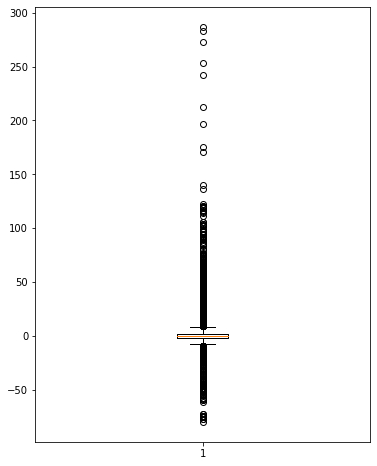

In [ ]:
plt.figure(figsize=(6,8))
plt.boxplot(train_set['delay'])
plt.show()

In [ ]:
IQR=train_set['delay'].quantile(0.75)-train_set['delay'].quantile(0.25)
lower=train_set['delay'].quantile(0.25)-(IQR*3)
upper=train_set['delay'].quantile(0.75)+(IQR*3)


In [ ]:
train_set.shape

(21505, 13)

In [ ]:
#Removing outliers
train_set=train_set[train_set['delay']<upper]
train_set=train_set[train_set['delay']>lower]

In [ ]:
train_set.shape

(20144, 13)

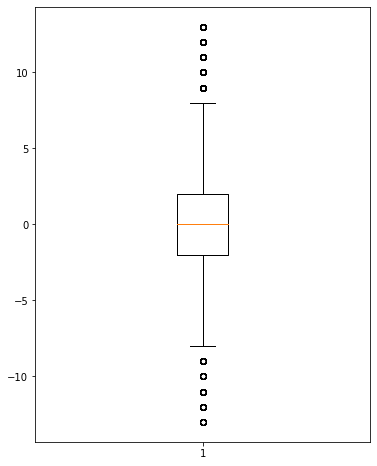

In [ ]:
plt.figure(figsize=(6,8))
plt.boxplot(train_set['delay'])
plt.show()

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


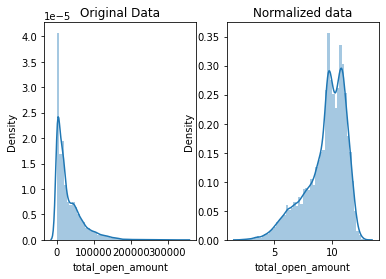

In [ ]:
normalized = np.log(train_set['total_open_amount'])
# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(train_set['total_open_amount'], ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized, ax=ax[1])
ax[1].set_title("Normalized data")
train_set['total_open_amount'] = normalized

In [ ]:
#Log transform of total_open_amount
train_set['log_amt']=np.log(train_set['total_open_amount'])
val_set['log_amt']=np.log(val_set['total_open_amount'])
test_set['log_amt']=np.log(test_set['total_open_amount'])

In [ ]:
train_set.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,document_create_date.1,due_in_date,document type,total_open_amount,baseline_create_date,cust_payment_terms,delay,log_amt
24329,U001,0200769623,WAL-MAR,2019-01-09,2019,1.928538e+09,2018-12-30,2019-01-14,2,10.592115,2018-12-30,NAH4,-5,2.360110
27801,U001,0200759878,SA corporation,2019-01-15,2019,1.928539e+09,2018-12-30,2019-01-14,2,9.828251,2018-12-30,NAH4,1,2.285261
36681,U001,0200769623,WAL-MAR systems,2019-01-09,2019,1.928541e+09,2018-12-30,2019-01-14,2,10.009557,2018-12-30,NAH4,-5,2.303540
26139,U001,0200769623,WAL-MAR trust,2019-01-09,2019,1.928540e+09,2018-12-30,2019-01-14,2,8.399744,2018-12-30,NAH4,-5,2.128201
8203,U001,0200769623,WAL-MAR trust,2019-01-09,2019,1.928533e+09,2018-12-30,2019-01-14,2,9.650604,2018-12-30,NAH4,-5,2.267020


In [ ]:
train_set

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,document_create_date.1,due_in_date,document type,total_open_amount,baseline_create_date,cust_payment_terms,delay,log_amt
24329,U001,0200769623,WAL-MAR,2019-01-09,2019,1.928538e+09,2018-12-30,2019-01-14,2,10.592115,2018-12-30,NAH4,-5,2.360110
27801,U001,0200759878,SA corporation,2019-01-15,2019,1.928539e+09,2018-12-30,2019-01-14,2,9.828251,2018-12-30,NAH4,1,2.285261
36681,U001,0200769623,WAL-MAR systems,2019-01-09,2019,1.928541e+09,2018-12-30,2019-01-14,2,10.009557,2018-12-30,NAH4,-5,2.303540
26139,U001,0200769623,WAL-MAR trust,2019-01-09,2019,1.928540e+09,2018-12-30,2019-01-14,2,8.399744,2018-12-30,NAH4,-5,2.128201
8203,U001,0200769623,WAL-MAR trust,2019-01-09,2019,1.928533e+09,2018-12-30,2019-01-14,2,9.650604,2018-12-30,NAH4,-5,2.267020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36224,U013,0140103409,BUTTE corp,2019-08-09,2019,1.991830e+09,2019-07-15,2019-08-14,2,6.169715,2019-07-15,NAVE,-5,1.819653
8097,U001,0200749782,KROG,2019-07-30,2019,1.929620e+09,2019-07-15,2019-07-30,2,9.636309,2019-07-15,NAA8,0,2.265538
29360,U001,200148860,DOLLA,2019-07-30,2019,1.929619e+09,2019-07-15,2019-07-30,2,11.334282,2019-07-15,NAA8,0,2.427832
45623,U001,0200875006,KROGER,2019-08-01,2019,1.929619e+09,2019-07-15,2019-07-30,2,11.020471,2019-07-15,NAA8,2,2.399755


In [ ]:
train_set.nunique()

business_code                 6
cust_number                1088
name_customer              2829
clear_date                  216
buisness_year                 1
doc_id                    20144
document_create_date.1      198
due_in_date                 267
document type                 1
total_open_amount         18569
baseline_create_date        204
cust_payment_terms           53
delay                        27
log_amt                   18569
dtype: int64

In [ ]:
#Extracting day month from the dates
train_set['clear_date_date'] = train_set['clear_date'].dt.dayofweek
train_set['clear_date_month'] = train_set['clear_date'].dt.month
train_set['doc_date'] = train_set['document_create_date.1'].dt.dayofweek
train_set['doc_month'] = train_set['document_create_date.1'].dt.month
train_set['due_date'] = train_set['due_in_date'].dt.dayofweek
train_set['due_month'] = train_set['due_in_date'].dt.month
train_set['baseline_week'] = train_set['baseline_create_date'].dt.dayofweek
train_set['baseline_month'] = train_set['baseline_create_date'].dt.month


val_set['clear_date_date'] = val_set['clear_date'].dt.dayofweek
val_set['clear_date_month'] = val_set['clear_date'].dt.month
val_set['doc_date'] = val_set['document_create_date.1'].dt.dayofweek
val_set['doc_month'] = val_set['document_create_date.1'].dt.month
val_set['due_date'] = val_set['due_in_date'].dt.dayofweek
val_set['due_month'] = val_set['due_in_date'].dt.month
val_set['baseline_week'] = val_set['baseline_create_date'].dt.dayofweek
val_set['baseline_month'] = val_set['baseline_create_date'].dt.month


test_set['clear_date_date'] = test_set['clear_date'].dt.dayofweek
test_set['clear_date_month'] = test_set['clear_date'].dt.month
test_set['doc_date'] = test_set['document_create_date.1'].dt.dayofweek
test_set['doc_month'] = test_set['document_create_date.1'].dt.month
test_set['due_date'] = test_set['due_in_date'].dt.dayofweek
test_set['due_month'] = test_set['due_in_date'].dt.month
test_set['baseline_week'] = test_set['baseline_create_date'].dt.dayofweek
test_set['baseline_month'] = test_set['baseline_create_date'].dt.month



In [ ]:
train_set.drop('document type',axis=1,inplace=True)
val_set.drop('document type',axis=1,inplace=True)
test_set.drop('document type',axis=1,inplace=True)
d.drop('document type',axis=1,inplace=True)

In [ ]:
relation=pd.DataFrame(train_set.groupby('business_code',as_index=False)['delay'].mean())
relation

,business_code,delay
0,CA02,3.449876
1,U001,-0.261339
2,U002,4.296875
3,U005,10.833333
4,U007,9.000000
5,U013,0.232143


<AxesSubplot:xlabel='business_code', ylabel='delay'>

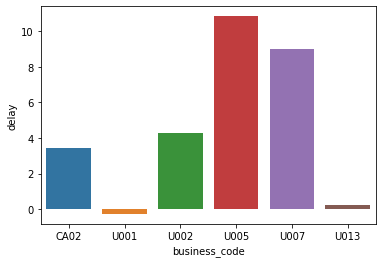

In [ ]:
sns.barplot(x="business_code",y="delay",data=relation)

In [ ]:
mapper = train_set.groupby('business_code')['delay'].mean().to_dict()#feature engineering
train_set['encoded_business_code'] = train_set['business_code'].map(mapper)
val_set['encoded_business_code'] = val_set['business_code'].map(mapper)
test_set['encoded_business_code'] = test_set['business_code'].map(mapper)

In [ ]:
mapper = train_set.groupby('cust_number')['delay'].mean().to_dict()#feature engineering
train_set['encoded_cust_code'] = train_set['cust_number'].map(mapper)
val_set['encoded_cust_code'] = val_set['cust_number'].map(mapper)
test_set['encoded_cust_code'] = test_set['cust_number'].map(mapper)

In [ ]:
mapper = train_set.groupby('cust_payment_terms')['delay'].mean().to_dict()#feature engineering
train_set['cust_payment_terms_encoded'] = train_set['cust_payment_terms'].map(mapper)
val_set['cust_payment_terms_encoded'] = val_set['cust_payment_terms'].map(mapper)
test_set['cust_payment_terms_encoded'] = test_set['cust_payment_terms'].map(mapper)

In [ ]:
d1=test_set.copy()

In [ ]:
train_set.drop(['business_code','cust_number','name_customer','doc_id','document_create_date.1','due_in_date','baseline_create_date','cust_payment_terms','clear_date'],axis=1,inplace=True)
val_set.drop(['business_code','cust_number','name_customer','doc_id','document_create_date.1','due_in_date','baseline_create_date','cust_payment_terms','clear_date'],axis=1,inplace=True)
test_set.drop(['business_code','cust_number','name_customer','doc_id','document_create_date.1','due_in_date','baseline_create_date','cust_payment_terms','clear_date'],axis=1,inplace=True)

In [ ]:
train_set.dtypes

buisness_year                   int64
total_open_amount             float64
delay                           int64
log_amt                       float64
clear_date_date                 int64
clear_date_month                int64
doc_date                        int64
doc_month                       int64
due_date                        int64
due_month                       int64
baseline_week                   int64
baseline_month                  int64
encoded_business_code         float64
encoded_cust_code             float64
cust_payment_terms_encoded    float64
dtype: object

In [ ]:
test_set.dtypes

buisness_year                   int64
total_open_amount             float64
delay                           int64
log_amt                       float64
clear_date_date                 int64
clear_date_month                int64
doc_date                        int64
doc_month                       int64
due_date                        int64
due_month                       int64
baseline_week                   int64
baseline_month                  int64
encoded_business_code         float64
encoded_cust_code             float64
cust_payment_terms_encoded    float64
dtype: object

In [ ]:
val_set.dtypes

buisness_year                   int64
total_open_amount             float64
delay                           int64
log_amt                       float64
clear_date_date                 int64
clear_date_month                int64
doc_date                        int64
doc_month                       int64
due_date                        int64
due_month                       int64
baseline_week                   int64
baseline_month                  int64
encoded_business_code         float64
encoded_cust_code             float64
cust_payment_terms_encoded    float64
dtype: object

In [ ]:
#Feature selection
from sklearn.feature_selection import VarianceThreshold
vs_const= VarianceThreshold(threshold=0)

In [ ]:
#Getting all numerical columns
numerical_cols = train_set[train_set.select_dtypes([np.number]).columns]

In [ ]:
vs_const.fit(numerical_cols)#fitting the object to data

VarianceThreshold(threshold=0)

In [ ]:
#getting constant and quasi-constant columns
const_cols = [column for column in numerical_cols.columns
                    if column not in numerical_cols.columns[vs_const.get_support()]]
const_cat_cols = [column for column in train_set.columns 
                        if (train_set[column].dtype == "O" and len(train_set[column].unique()) == 1)]

In [ ]:
const_cols

['buisness_year']

In [ ]:
const_cat_cols

[]

In [ ]:
threshold = 0.99#setting a threshold

In [ ]:
quasi_const_feature = []#create empty list
for feature in train_set.columns:

    # calculate the ratio.
    predominant = (train_set[feature].value_counts() / np.float(len(train_set))).sort_values(ascending=False).values[0]
    
    # append the column name if it is bigger than the threshold
    if predominant >= threshold:
        quasi_const_feature.append(feature)   
        
print(quasi_const_feature)

['buisness_year']


In [ ]:
#dropping the quasi constant  and constant features
train_set.drop('buisness_year',axis=1,inplace=True)
val_set.drop('buisness_year',axis=1,inplace=True)
test_set.drop('buisness_year',axis=1,inplace=True)

In [ ]:
! pip install xgboost

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Modeling & Accuracy Metrics
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [ ]:
MSE_Score=[]
R2_Score=[]
Algorithm=[]

In [ ]:
Algorithm.append('XGB Regressor')
clf = xgb.XGBRegressor()
clf.fit(train_set.drop('delay',axis=1), train_set['delay'])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
predicted = clf.predict(val_set.drop('delay',axis=1))

In [ ]:
from sklearn.metrics import mean_squared_error
MSE_Score.append(mean_squared_error(val_set['delay'], predicted))

In [ ]:
from sklearn.metrics import r2_score
R2_Score.append(r2_score(val_set['delay'], predicted))

In [ ]:
MSE_Score

[109.21417638799112]

In [ ]:
R2_Score


[-0.11521483496733187]

In [ ]:
Y_train=train_set['delay']
X_train=train_set.drop(['delay'],axis=1)

In [ ]:
Y_test=test_set['delay']
X_test=test_set.drop(['delay'],axis=1)

In [ ]:
clf=xgb.XGBRegressor()
clf.fit(X_train,Y_train)
predicted=clf.predict(X_test).astype(int)

In [ ]:
d1['predicted_date']=d1['due_in_date'] + pd.to_timedelta(predicted,unit='D')

In [ ]:
bins = [-55, 15, 30, 45, 60, 120]
bin_labels = ['0 to 15 days', '16 to 30 days', '31 to 45 days', '45 to 60 days', 'Greater than 60 days']
d1['aging_bucket'] = pd.cut(predicted, bins, labels=bin_labels)

In [ ]:
d1[['due_in_date','predicted_date','aging_bucket']]

,due_in_date,predicted_date,aging_bucket
33466,2019-11-12,2019-11-20,0 to 15 days
10993,2019-10-23,2019-10-25,0 to 15 days
19699,2019-10-23,2019-10-23,0 to 15 days
7752,2019-10-23,2019-10-21,0 to 15 days
32040,2019-10-23,2019-10-24,0 to 15 days
...,...,...,...
6861,2020-03-13,2020-03-15,0 to 15 days
25408,2020-03-13,2020-03-15,0 to 15 days
11606,2020-03-10,2020-03-13,0 to 15 days
11752,2020-03-13,2020-03-13,0 to 15 days


In [ ]:
d1['aging_bucket'].value_counts()

0 to 15 days            13048
16 to 30 days              49
31 to 45 days               0
45 to 60 days               0
Greater than 60 days        0
Name: aging_bucket, dtype: int64